# Ch3. The forecaster's toolbox

## Sec. 3.1 Some simple forecasting methods

### Average method

- The forecasts of all future values are equal to the average (or “mean”) of the historical data.
- 즉, 과거 데이터의 평균으로 예측

$$ \hat{y}_{T+h|T} = \bar{y} = (y_1+\cdots +y_T)/T $$


### Naïve method 

- Simply set all forecasts to be the value of the last observation. 
- 마지막 관측값으로 예측
- data가 random walk를 따르면 naïve forecast가 최적이므로 **random walk forecasts**라 하기도 함.

$$ \hat{y}_{T+h|T} = y_T $$

### Seasonal naïve method

$$ \hat{y}_{T+h|T} = y_{T+h-m(k+1)} $$
- $m=$ the seasonal period
- $k=$ the number of complete years in the forecast period prior to time $T+h$ (i.e., the integer part of $(h-1)/m$)
- 이전 패턴의 같은 시즌의 값으로 예측

### Drift method

$$ \hat{y}_{T+h|T} = y_T + \frac{h}{T-1}\sum_{t=2}^{T}(y_t - y_{t-1}) = y_t +h\left(\frac{y_T-y_1}{T-1}\right)$$
- naïve method의 변형
- drift: 과거 데이터의 평균 변화량

### Examples 

data from FPP

code refer to https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [1]:
import pandas as pd
import datetime as dt
# from math import pi
import numpy as np
# pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'


**Ex1. Forecasts of Australian quarterly beer production**

In [2]:
beer = pd.read_csv('../data/beerdata.csv')
# beer['index'] = pd.period_range('1956-01-01', '2010-06-30', freq='Q')
beer['index'] = pd.date_range('1956-01-01', '2010-06-30', freq='Q')

beer.set_index('index', inplace=True)
display(beer.head())
beer.info()

,value
index,
1956-03-31,284
1956-06-30,213
1956-09-30,227
1956-12-31,308
1957-03-31,262


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218 entries, 1956-03-31 to 2010-06-30
Data columns (total 1 columns):
value    218 non-null int64
dtypes: int64(1)
memory usage: 3.4 KB


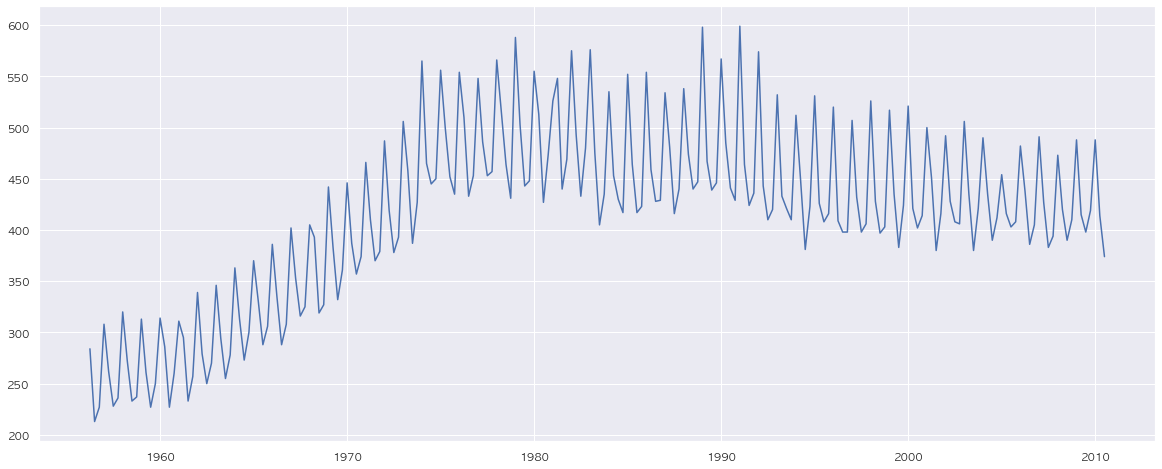

In [13]:
fig = plt.subplots(figsize=(20,8))
plt.plot(beer['value'])
plt.show()

In [4]:
beer_h = pd.DataFrame()
beer_h['index'] = pd.date_range('1992-01-01', '2008-01-01', freq='Q')
beer_h.set_index('index', inplace=True)
beer_h['value'] = beer['1992-01-01':'2008-01-01']

display(beer_h.tail(15))
beer_h.info()

,value
index,
2004-06-30,390
2004-09-30,412
2004-12-31,454
2005-03-31,416
2005-06-30,403
2005-09-30,408
2005-12-31,482
2006-03-31,438
2006-06-30,386


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 64 entries, 1992-03-31 to 2007-12-31
Data columns (total 1 columns):
value    64 non-null int64
dtypes: int64(1)
memory usage: 1.0 KB


In [5]:
beer_f = pd.DataFrame(pd.date_range('2008-01-01', '2011-01-01', freq='Q'), columns=['index'])#.set_index('index')
n = beer_f.size
beer_f['Mean'] = [beer_h.mean().value] * n
beer_f['Naive'] = [beer_h.iloc[-1].value] * n
beer_f['Seasonal Naive'] = [0] * n
beer_f

,index,Mean,Naive,Seasonal Naive
0,2008-03-31,435.375,473,0
1,2008-06-30,435.375,473,0
2,2008-09-30,435.375,473,0
3,2008-12-31,435.375,473,0
4,2009-03-31,435.375,473,0
5,2009-06-30,435.375,473,0
6,2009-09-30,435.375,473,0
7,2009-12-31,435.375,473,0
8,2010-03-31,435.375,473,0
9,2010-06-30,435.375,473,0


In [6]:
q1 = beer_h[beer_h.index.month==3].iloc[-1].value
q2 = beer_h[beer_h.index.month==6].iloc[-1].value
q3 = beer_h[beer_h.index.month==9].iloc[-1].value
q4 = beer_h[beer_h.index.month==12].iloc[-1].value
quarter_dict = {3:q1, 6:q2, 9:q3, 12:q4}
# print(q1,q2,q3,q4)

for i, m in enumerate(pd.to_datetime(beer_f['index']).dt.month):
#     print(m, quarter_dict[m])
    beer_f.iloc[i,3] = quarter_dict[m]
    
beer_f.set_index('index', inplace=True)

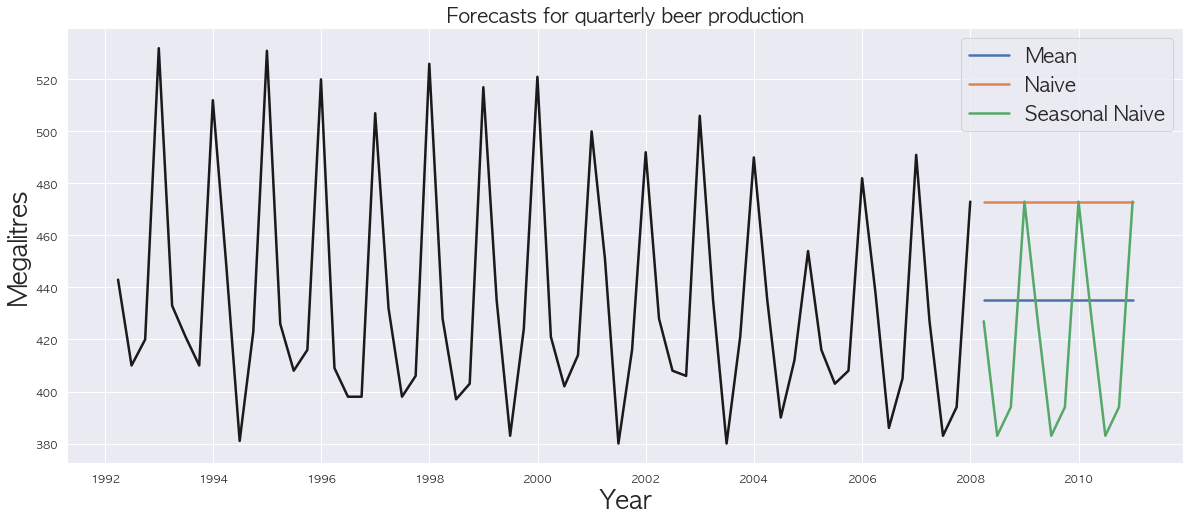

In [7]:
fig = plt.subplots(figsize=(20,8))
plt.plot(beer_f, linewidth=2.5)
plt.legend(beer_f.columns.values, fontsize=20)

plt.plot(beer_h, label='observed', color='k', linewidth=2.5)
plt.ylabel('Megalitres', fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.title('Forecasts for quarterly beer production', fontsize=20)
plt.show()

**Ex2. Forecasts based on 200 days of the Google daily closing stock price**
- Non-seasonal methods are applied to a series of 200 days of the Google daily closing stock price.

In [8]:
goog = pd.read_csv('../data/googledata.csv').set_index('index')
goog

,value
index,
1,392.830017
2,392.512085
3,397.305908
4,398.011322
5,400.490204
...,...
196,523.832947
197,523.226929
198,525.671021


In [9]:
goog_f = pd.DataFrame(list(range(201,241)), columns=['index'])#.set_index('index')
n = goog_f.size
goog_f['Mean'] = [goog.mean().value] * n
goog_f['Naive'] = [goog.iloc[-1].value] * n
goog_f['Drift'] = [0] * n
goog_f.head()

,index,Mean,Naive,Drift
0,201,442.576292,531.478271,0
1,202,442.576292,531.478271,0
2,203,442.576292,531.478271,0
3,204,442.576292,531.478271,0
4,205,442.576292,531.478271,0


In [10]:
l = goog.size

yh = []
for h in range(1,n+1):
    drift = 0
    for t in range(1,l):
        drift += goog.iloc[t].value - goog.iloc[t-1].value
    yt = goog.iloc[-1].value
    new = yt + h/(l-1)*drift
    yh.append(new)
    
goog_f['Drift'] = yh
goog_f.set_index('index', inplace=True)

In [11]:
goog_f.head()

,Mean,Naive,Drift
index,,,
201,442.576292,531.478271,532.174996
202,442.576292,531.478271,532.871721
203,442.576292,531.478271,533.568446
204,442.576292,531.478271,534.265171
205,442.576292,531.478271,534.961895


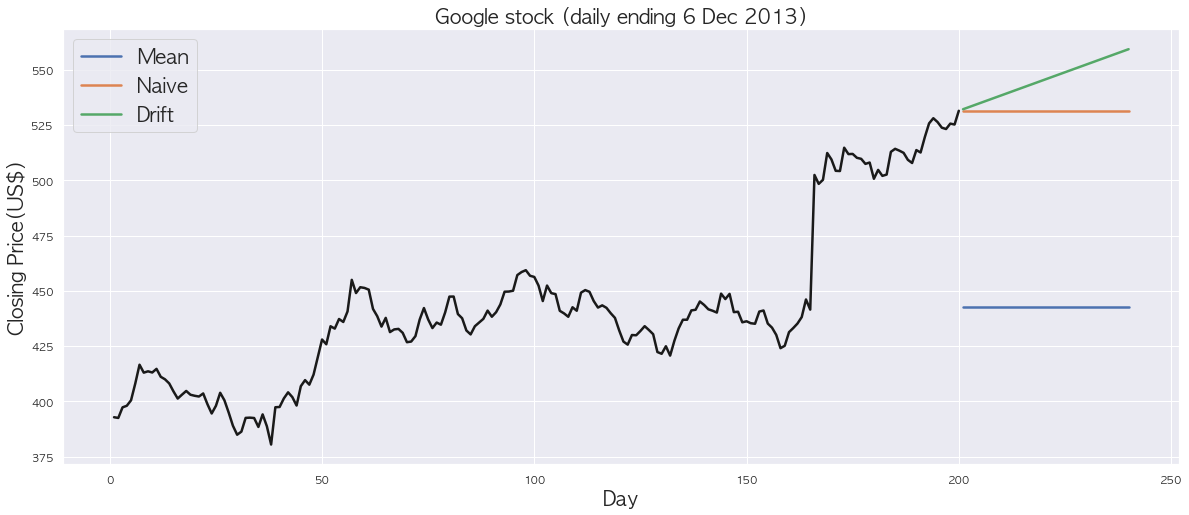

In [12]:
fig = plt.subplots(figsize=(20,8))
plt.plot(goog_f, linewidth=2.5)
plt.legend(goog_f.columns.values, fontsize=20)

plt.plot(goog, label='observed', color='k', linewidth=2.5)
plt.ylabel('Closing Price(US$)', fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.title('Google stock (daily ending 6 Dec 2013)', fontsize=20)
plt.show()